In [ ]:
#Imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import folium
from folium.plugins import MarkerCluster
import re

In [ ]:
#Load data
data = pd.read_excel('/content/UFOs_coord.xlsx')
data.head(10)

Date / Time Country           City State     Shape  \
0  12/21/16 19:15     USA     Waynesboro    VA    Sphere   
1  12/21/16 00:00     USA     Louisville    KY   Unknown   
2  12/20/16 22:30     USA     Santa Rosa    CA    Sphere   
3  12/20/16 19:00     USA         Fresno    CA    Circle   
4  12/19/16 21:53     USA        Reymert    AZ    Circle   
5  12/19/16 21:50     USA        Redding    CA     Light   
6  12/19/16 20:02     USA        Gilbert    AZ     Light   
7  12/19/16 19:02     USA        Phoenix    AZ    Circle   
8  12/19/16 18:30     USA  Huber Heights    OH  Cylinder   
9  12/19/16 18:00     USA         Conway    AR   Chevron   

                                             Summary        lat         lng  
0               Bright round object hovering in sky.  38.065229  -78.905888  
1  Multiple craft ascending from north of Shelbyv...  38.254238  -85.759407  
2  Bright orange planet-like object sighted near ...  38.440467 -122.714431  
3      Twelve orange globes in formation over Fresno  36.729529 -119.708861  
4  While camping in the Cottonwood canyon Rd., al...  33.229779 -111.209290  
5  Stargazing I saw a star just appear then moves...  40.586356 -122.391675  
6  Undulating swarm cloud of thousands of multi-c...  33.294207 -111.737947  
7  Bright light in the night sky. Disappears with...  33.448587 -112.077346  
8  Entire family sees very large, stationary, bri...  39.859024  -84.111363  
9  ((NUFORC Note: No information provided by witn...  35.088696  -92.442101

In [ ]:
#Checking for missing values
print(data.isnull().sum())
print(data.describe())

Date / Time    0
Country        0
City           0
State          0
Shape          0
Summary        0
lat            0
lng            0
dtype: int64
               lat          lng
count  5177.000000  5177.000000
mean     38.594944   -94.892339
std       5.800210    18.442668
min      19.062767  -162.597762
25%      34.225728  -112.298280
50%      39.049011   -88.351460
75%      42.360816   -80.124767
max      66.898206   -60.087349


In [ ]:
print(data['Shape'].unique())

print(data['State'].unique())

print(data['City'].unique())

['Sphere' 'Unknown' 'Circle' 'Light' 'Cylinder' 'Chevron' 'Triangle'
 'Formation' 'Other' 'Fireball' 'Oval' 'Egg' 'Flash' 'Disk' 'Changing'
 'Cigar' 'Rectangle' 'Cone' 'Diamond' 'Cross' 'Teardrop']
['VA' 'KY' 'CA' 'AZ' 'OH' 'AR' 'AK' 'MO' 'UT' 'TX' 'AB' 'HI' 'OR' 'KS'
 'FL' 'NM' 'TN' 'CO' 'WA' 'OK' 'NV' 'NY' 'CT' 'SC' 'AL' 'GA' 'VT' 'NJ'
 'IL' 'IA' 'MI' 'MD' 'MN' 'MT' 'LA' 'PA' 'SD' 'MA' 'NC' 'ME' 'NS' 'SK'
 'NH' 'ON' 'WV' 'IN' 'MS' 'WY' 'WI' 'RI' 'NE' 'ND' 'BC' 'ID' 'DE' 'QC'
 'MB' 'YT' 'NB']
['Waynesboro' 'Louisville' 'Santa Rosa' ... 'Hereford Township' 'Arnold'
 'Vernon']


<Axes: xlabel='Country', ylabel='count'>

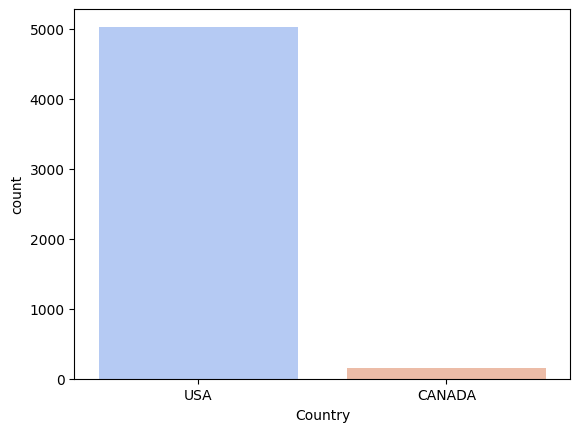

In [ ]:
#Check the counts per country
sns.countplot(data = data, x = 'Country', palette = 'coolwarm')

In [ ]:
#Iinteractive map
fig = px.scatter_geo(data,
                     lat='lat',
                     lon='lng',
                     color='Shape',
                     hover_name='Summary',
                     projection='natural earth',
                     title='UFO Sightings in the US and Canada',
                     )

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.show()

In [ ]:
# Count of Shapes reported per State
shape_distribution = data.groupby(['State', 'Shape']).size().unstack(fill_value=0)
print(shape_distribution)

Shape  Changing  Chevron  Cigar  Circle  Cone  Cross  Cylinder  Diamond  Disk  \
State                                                                           
AB            0        0      0       0     0      0         0        0     2   
AK            1        0      2       7     0      0         0        0     1   
AL            0        0      2       7     1      0         2        1     0   
AR            1        2      2       3     0      0         0        0     0   
AZ            8        1      1      27     0      1         5        1    10   
BC            1        0      0       2     0      1         0        0     4   
CA           14       10     10      62     4      2         7        6    21   
CO            5        4      3      20     1      2         4        5     8   
CT            2        0      0       9     0      1         0        0     3   
DE            0        0      0       2     1      0         0        0     3   
FL            9        7    

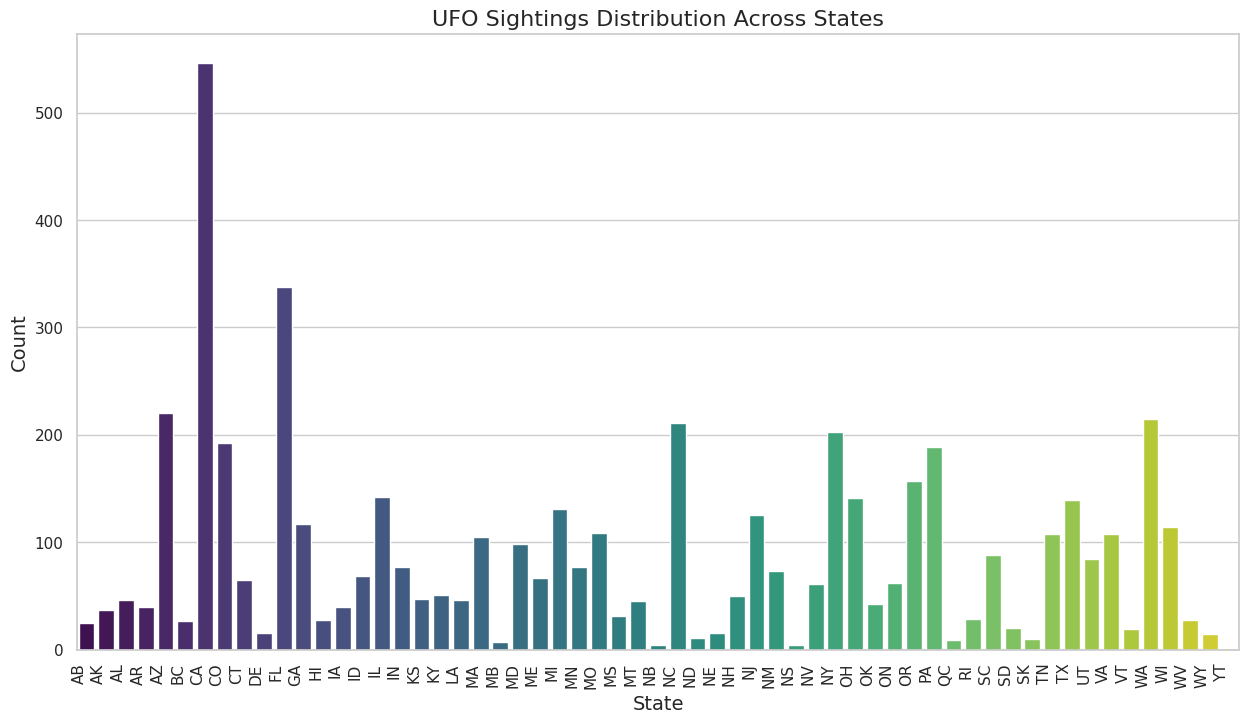

In [ ]:
sns.set(style="whitegrid")

#size and style
plt.figure(figsize=(15, 8))

#bar chart
sns.barplot(x=shape_distribution.index, y=shape_distribution.sum(axis=1), palette="viridis")

#labels and title
plt.title('UFO Sightings Distribution Across States', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Count', fontsize=14)

plt.xticks(rotation=90, ha='right')
plt.show()

In [ ]:
# Grouping by 'State' and 'Shape', then count the sightings
state_shape_counts = data.groupby(['State', 'Shape']).size().reset_index(name='Count')

# Shape with the maximum sightings for each state
max_shape_per_state = state_shape_counts.loc[state_shape_counts.groupby('State')['Count'].idxmax()]

# Arrange the DataFrame with counts in descending order
max_shape_per_state_sorted = max_shape_per_state.sort_values(by='Count', ascending=False)

print(max_shape_per_state_sorted)

    State     Shape  Count
93     CA     Light    112
149    FL    Circle     67
63     AZ     Light     63
534    NY     Light     54
620    PA     Light     43
435    NC     Light     39
765    WA     Light     38
227    IL     Light     38
705    TX     Light     33
354    MI     Light     33
176    GA     Light     31
782    WI     Light     29
479    NJ     Light     29
554    OH     Light     28
114    CO     Light     27
600    OR     Light     26
390    MO     Light     25
687    TN     Light     24
303    MA     Light     23
582    ON     Light     21
495    NM     Light     19
731    VA    Circle     18
325    MD     Light     18
211    ID     Light     18
656    SC     Light     17
567    OK     Light     15
370    MN     Light     15
242    IN     Light     15
721    UT     Light     14
129    CT     Light     14
257    KS     Light     14
196    IA     Light     13
335    ME    Circle     12
285    LA     Light     12
514    NV     Light     11
403    MS     Light     11
2

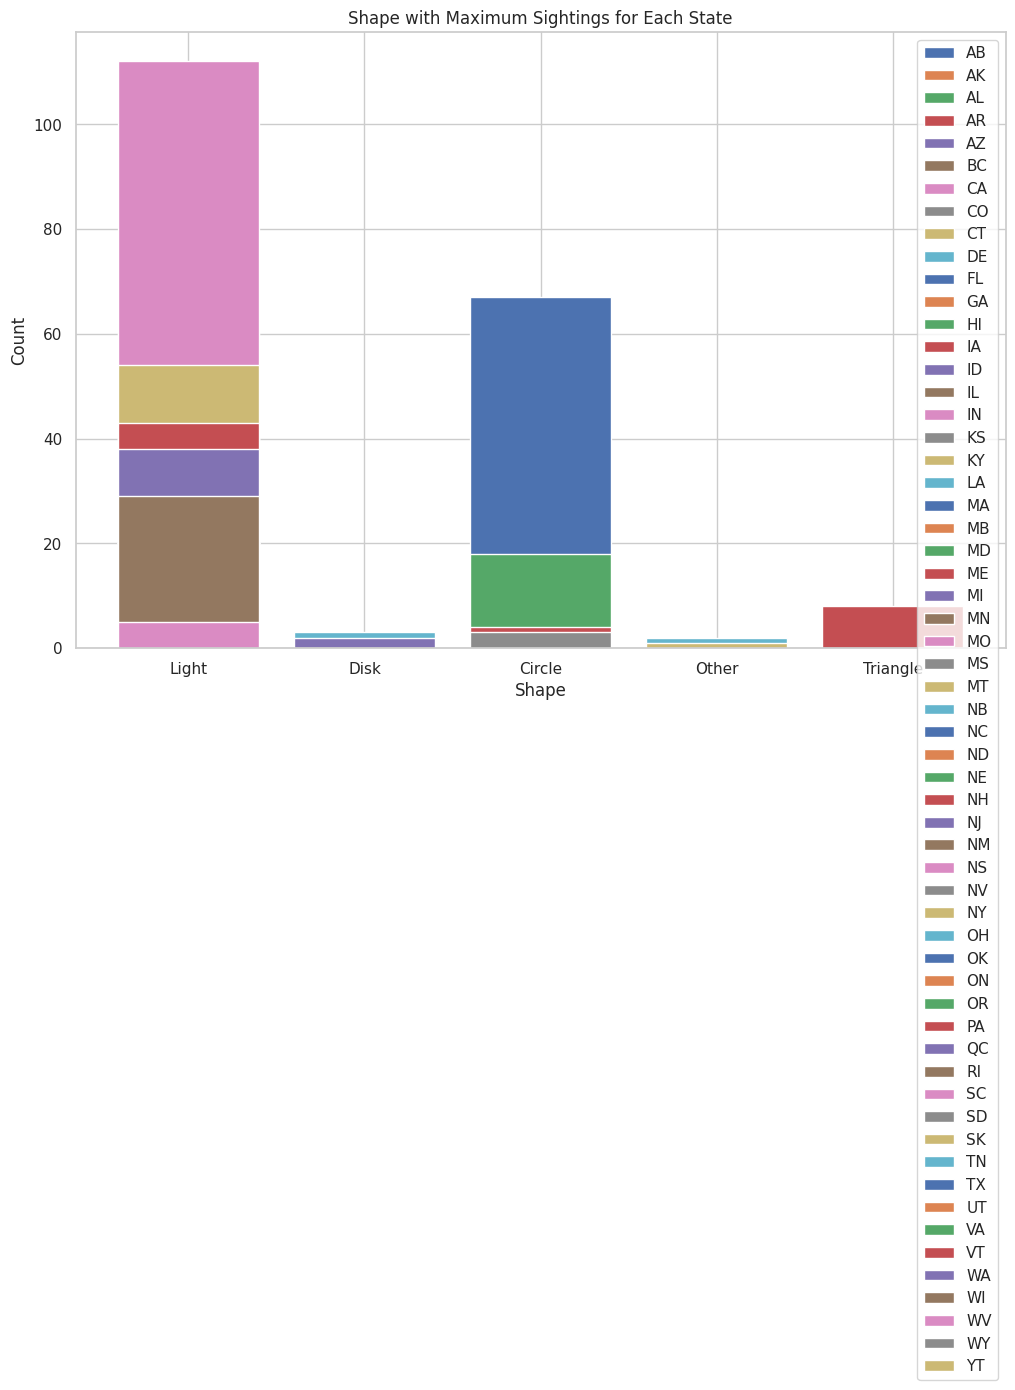

In [ ]:
# Plot
plt.figure(figsize=(12, 8))
for state, subset in max_shape_per_state_sorted.groupby('State'):
    plt.bar(subset['Shape'], subset['Count'], label=state)

plt.xlabel('Shape')
plt.ylabel('Count')
plt.title('Shape with Maximum Sightings for Each State')
plt.legend()
plt.show()

In [ ]:
# Grouping by 'State' and 'Shape', then count the sightings
state_shape_counts = data.groupby(['State', 'Shape']).size().reset_index(name='Count')

#shape with the maximum sightings for each state
max_shape_per_state = state_shape_counts.loc[state_shape_counts.groupby('State')['Count'].idxmax()]
print(max_shape_per_state)

    State     Shape  Count
5      AB     Light      9
17     AK     Light      9
31     AL     Light     10
45     AR     Light     10
63     AZ     Light     63
75     BC     Light      7
93     CA     Light    112
114    CO     Light     27
129    CT     Light     14
139    DE      Disk      3
149    FL    Circle     67
176    GA     Light     31
185    HI     Light     11
196    IA     Light     13
211    ID     Light     18
227    IL     Light     38
242    IN     Light     15
257    KS     Light     14
271    KY     Light     11
285    LA     Light     12
303    MA     Light     23
313    MB     Light      3
325    MD     Light     18
335    ME    Circle     12
354    MI     Light     33
370    MN     Light     15
390    MO     Light     25
403    MS     Light     11
414    MT     Light      9
421    NB     Other      2
435    NC     Light     39
443    ND    Circle      4
448    NE    Circle      5
466    NH  Triangle      8
479    NJ     Light     29
495    NM     Light     19
5

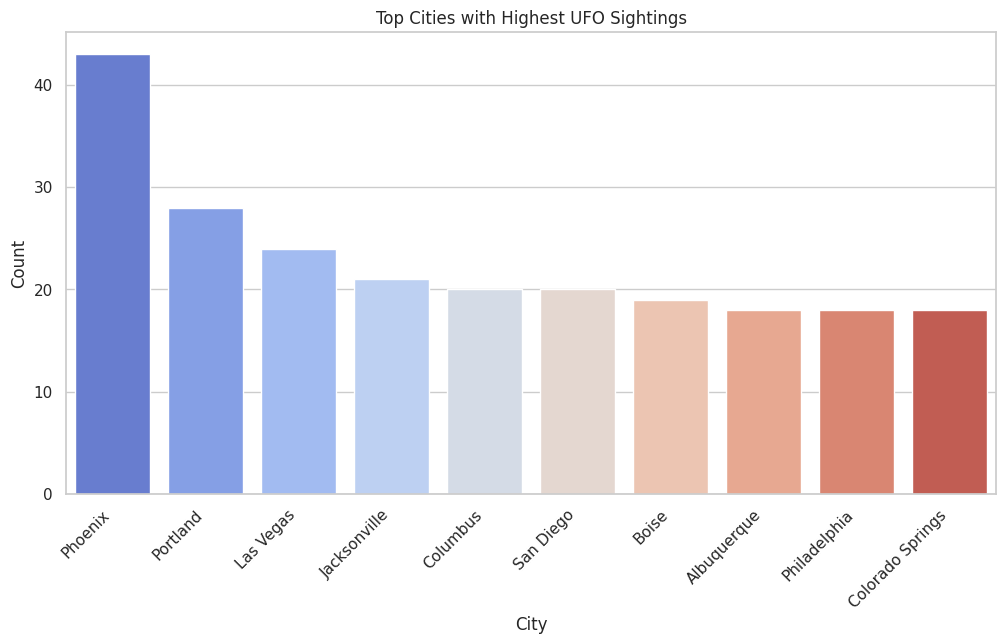

In [ ]:
# cities with the highest UFO sightings
top_cities = data['City'].value_counts().nlargest(10)

#bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette='coolwarm')
plt.title('Top Cities with Highest UFO Sightings')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# plot UFO sighthing by shape
fig = px.histogram(data, x='Shape', title='Count of UFO Sightings by Shape', color='Shape')
fig.update_xaxes(tickangle=45)
fig.show()

In [ ]:
# Convert Date/Time to datetime
data['Date / Time'] = pd.to_datetime(data['Date / Time'])

# Extracting month from the "Date / Time"
data['Month'] = data['Date / Time'].dt.month

# Grouping by month and count the sightings
monthly_counts = data['Month'].value_counts().sort_index().reset_index()
monthly_counts.columns = ['Month', 'Number of Sightings']

# Createing interactive line graph
fig = px.line(monthly_counts, x='Month', y='Number of Sightings', markers=True, title='UFO Sightings Over the Months')
fig.update_layout(xaxis_title='Month', yaxis_title='Number of Sightings')
fig.show()


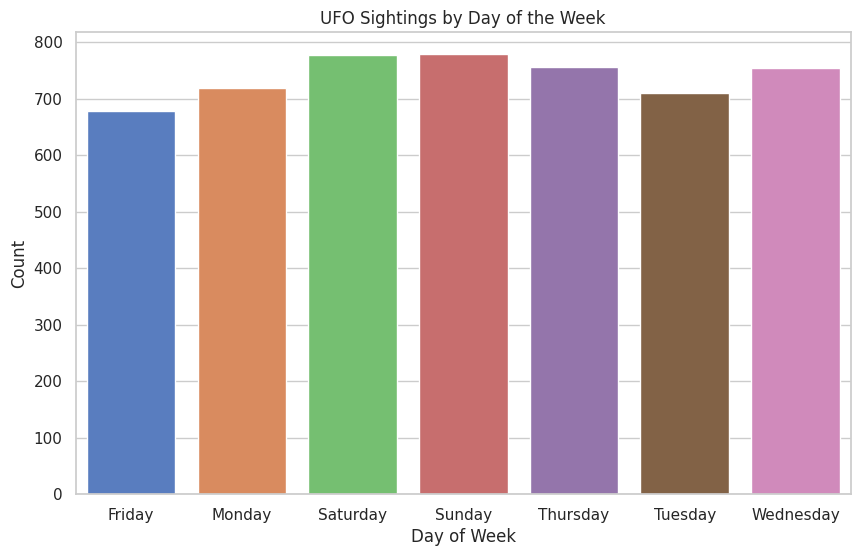

In [ ]:
#Date/Time column to datetime
data['Date / Time'] = pd.to_datetime(data['Date / Time'])

# Extract day
data['Day of Week'] = data['Date / Time'].dt.day_name()

# Grouping UFO sightings by Day
day_of_week_counts = data['Day of Week'].value_counts().sort_index()

#bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=day_of_week_counts.index, y=day_of_week_counts.values, palette='muted')
plt.title('UFO Sightings by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

In [ ]:
# Convert "Date / Time" to datetime
data['Date / Time'] = pd.to_datetime(data['Date / Time'])

# Extracting hour
data['Hour'] = data['Date / Time'].dt.hour

# Grouping by hour and count the sightings
hourly_counts = data['Hour'].value_counts().sort_index().reset_index()
hourly_counts.columns = ['Hour', 'Number of Sightings']

# Interactive line grapg
fig = px.line(hourly_counts, x='Hour', y='Number of Sightings', markers=True, title='UFO Sightings Over the Hours')
fig.update_layout(xaxis_title='Hour', yaxis_title='Number of Sightings')
fig.show()

In [ ]:
#Change format
data['Date / Time'] = pd.to_datetime(data['Date / Time'])
data['Hour'] = data['Date / Time'].dt.hour

shape_hour_counts = data.groupby(['Shape', 'Hour']).size().reset_index(name='Count')
#index with the maximum count for each shape
max_hour_index = shape_hour_counts.groupby('Shape')['Count'].idxmax()

#corresponding hour and count
shape_peak_hour = shape_hour_counts.loc[max_hour_index, ['Shape', 'Hour', 'Count']]
print(shape_peak_hour)

         Shape  Hour  Count
18    Changing    20     15
39     Chevron    21     12
60       Cigar    22     13
83      Circle    21    117
93        Cone    19      4
108      Cross    22      7
128   Cylinder    21     10
147    Diamond    20     12
172       Disk    21     19
188        Egg    20      4
213   Fireball    21    112
233      Flash    22     20
256  Formation    21     38
280      Light    21    215
304      Other    21     49
327       Oval    20     25
349  Rectangle    21     12
373     Sphere    21     45
392   Teardrop    21     11
417   Triangle    22     77
440    Unknown    21     63


In [ ]:
#Plot
fig = px.bar(shape_peak_hour, x='Hour', y='Count', color='Shape', title='Count of Sightings by Hour for Each Shape')
fig.update_layout(xaxis_title='Hour', yaxis_title='Count', legend_title='Shape')
fig.show()


In [ ]:
#Date/Time column to datetime
data['Date / Time'] = pd.to_datetime(data['Date / Time'])

# Extract day
data['Day of Week'] = data['Date / Time'].dt.day_name()

# Grouping by Shape and day and count sightings
shape_day_counts = data.groupby(['Shape', 'Day of Week']).size().reset_index(name='Count')

# shape with the maximum sightings for each day
max_shape_per_day = shape_day_counts.loc[shape_day_counts.groupby('Day of Week')['Count'].idxmax()]
print(max_shape_per_day)

    Shape Day of Week  Count
91  Light      Friday    142
92  Light      Monday    159
93  Light    Saturday    160
94  Light      Sunday    170
95  Light    Thursday    170
96  Light     Tuesday    151
97  Light   Wednesday    166


In [ ]:
# Sort by day and count in descending order
shape_day_counts = shape_day_counts.sort_values(by=['Day of Week', 'Count'], ascending=[True, False])

#second-highest occurring shape
second_max_shape_per_day = shape_day_counts.groupby('Day of Week').nth(1)
print(second_max_shape_per_day)

                Shape  Count
Day of Week                 
Friday         Circle     95
Monday         Circle     94
Saturday       Circle    106
Sunday         Circle    110
Thursday       Circle    105
Tuesday        Circle     89
Wednesday    Fireball     92


In [ ]:
#highest three shapes per day of the week
highest_shapes_per_day = shape_day_counts.groupby('Day of Week').head(3)
print(highest_shapes_per_day)

        Shape Day of Week  Count
91      Light      Friday    142
21     Circle      Friday     95
133  Triangle      Friday     81
92      Light      Monday    159
22     Circle      Monday     94
134  Triangle      Monday     76
93      Light    Saturday    160
23     Circle    Saturday    106
135  Triangle    Saturday     73
94      Light      Sunday    170
24     Circle      Sunday    110
136  Triangle      Sunday     71
95      Light    Thursday    170
25     Circle    Thursday    105
144   Unknown    Thursday     81
96      Light     Tuesday    151
26     Circle     Tuesday     89
138  Triangle     Tuesday     74
97      Light   Wednesday    166
76   Fireball   Wednesday     92
27     Circle   Wednesday     79


In [ ]:
#Plot it
fig = px.bar(highest_shapes_per_day,
             x='Day of Week',
             y='Count',
             color='Shape',
             text='Count',
             title='Highest Three UFO Shapes Per Day of the Week',
             labels={'Count': 'Number of Sightings'},
             color_discrete_sequence=px.colors.qualitative.Set3)

fig.update_layout(
    xaxis=dict(title="Day of Week"),
    yaxis=dict(title="Number of Sightings"),
    legend_title="UFO Shape"
)
fig.show()

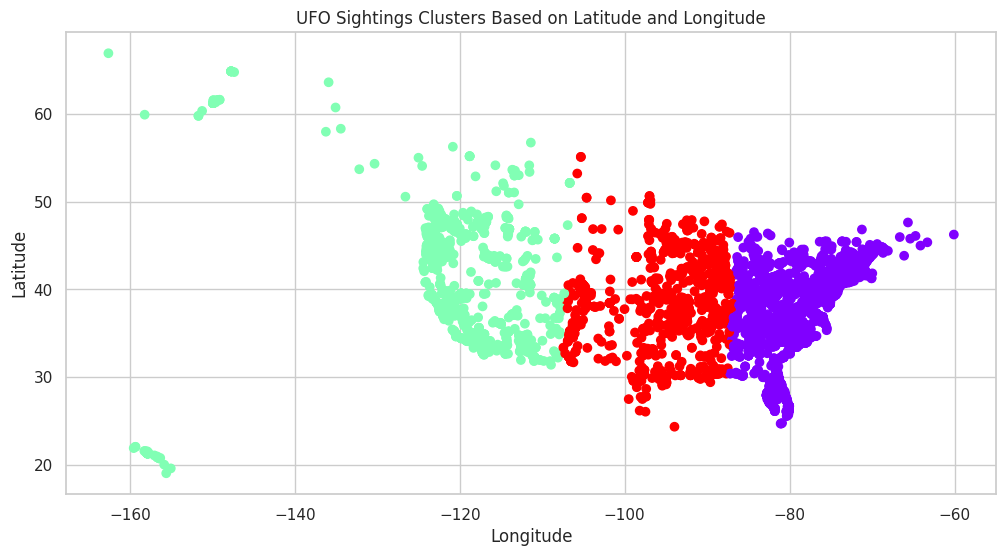

In [ ]:
#columns for clustering
coordinates = data[['lat', 'lng']]

#Using K-Means clustering to identify clusters of sightings
kmeans = KMeans(n_clusters=3)  # You can adjust the number of clusters as needed
data['Cluster'] = kmeans.fit_predict(coordinates)

#scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(data['lng'], data['lat'], c=data['Cluster'], cmap='rainbow', marker='o')
plt.title('UFO Sightings Clusters Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.show()

In [ ]:
#Interactive map with markers
map = folium.Map(location=[38.06522, -78.90298], zoom_start=5)
marker_cluster = MarkerCluster().add_to(map)

for index, row in data.iterrows():
    lat, lng = row['lat'], row['lng']
    popup_text = f"City: {row['City']}<br>State: {row['State']}<br>Shape: {row['Shape']}"
    folium.Marker([lat, lng], popup=popup_text).add_to(marker_cluster)

map

       Word  Count
23      the   2447
4        in   2279
25        a   2043
16      and   1821
11       of   1391
19       to   1163
45        I   1087
72   lights   1056
81    light   1041
122     was    830


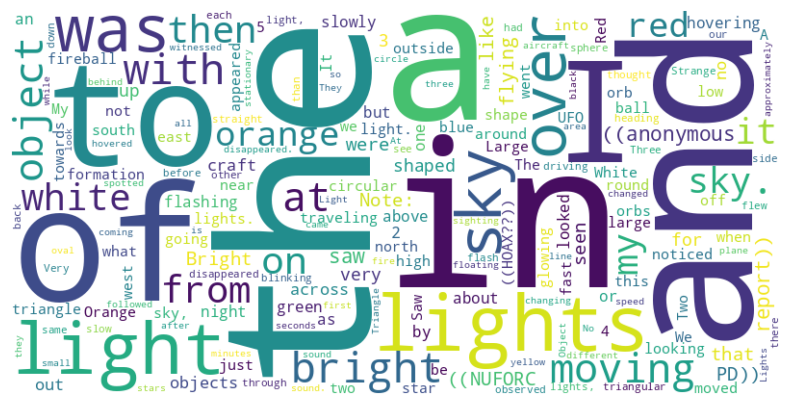

In [ ]:
# Combine summaries
all_summaries = ' '.join(data['Summary'].dropna())

# Tokenizing text into words
words = all_summaries.split()

# frequency of words
word_counts = Counter(words)
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])

# Sort in descending order
word_counts_df = word_counts_df.sort_values(by='Count', ascending=False)
print(word_counts_df.head(10))

# Plot word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#shapes in the summary
shape_counts = Counter()

# Regular expression pattern
shape_pattern = re.compile(r'\b(?:Sphere|Unknown|Circle|Light|Cylinder|Chevron|Triangle|Formation|Other|Fireball|Oval|Egg|Flash|Disk|Changing|Cigar|Rectangle|Cone|Diamond|Cross|Teardrop)\b', flags=re.IGNORECASE)

# Iterate to count the occurrences
for summary in data['Summary'].dropna():
    matches = re.findall(shape_pattern, summary)
    shape_counts.update(matches)

print("Counts of Shapes Mentioned:")
for shape, count in shape_counts.most_common(10):
    print(f"{shape}: {count}")

Counts of Shapes Mentioned:
light: 1244
formation: 200
triangle: 173
fireball: 139
other: 120
sphere: 101
flash: 90
circle: 79
Light: 74
oval: 68


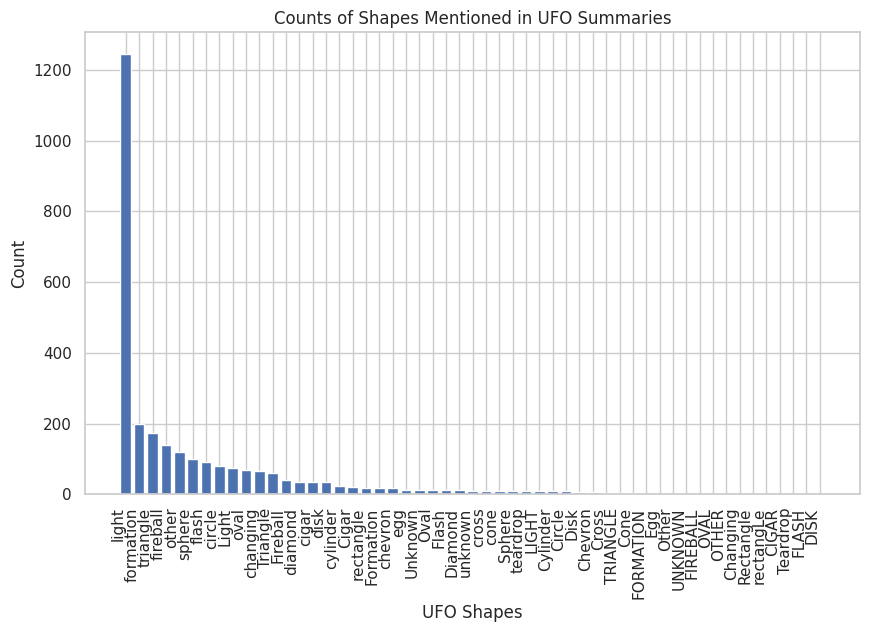

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar([shape for shape, count in shape_counts.most_common()], [count for shape, count in shape_counts.most_common()])
plt.xlabel('UFO Shapes')
plt.ylabel('Count')
plt.title('Counts of Shapes Mentioned in UFO Summaries')
plt.xticks(rotation=90, ha='right')
plt.show()